## House Pricing Prediction For Wazobia Real Estate Limited in Nigeria

In [160]:
# importing the python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error

In [132]:
# creating a function for cleaning and wrangling the data

def wrangle(filepath):
    
    df = pd.read_csv(filepath)
    # fill the loc column with Kaduna
    df["loc"] = df["loc"].fillna("Kaduna")
    
    # fill the NaN value in the bedroom column with 1.0
    bed_min = df["bedroom"].min()
    df = df.fillna(value={'bedroom':bed_min})
    
    # fill the title column with Flat
    df["title"] = df["title"].fillna("Flat")
    
    # Fill the parking space with 4.0
    df["parking_space"] = df["parking_space"].fillna(4.0)
    
    # fill the bathroom with 1.0
    df["bathroom"] = df["bathroom"].fillna(1.0)
    
    # Drop off the "ID" column
    df = df.drop(columns=["ID"], axis=1)
    
    return df

In [133]:
#Loading the dataset

df = wrangle("Housing_dataset_train.csv")



Fill the missing location column with Kaduna because majority of the house location are in kaduna.

Fill the missing value in the bedroom column with 1.0, because majority of the bedroom are one bedroom.

Fill the missing title column with Flat, because majority of the house title are flat.

Fill the missing parking space with 4.0.
    
Fill the missing bathroom with 1.0.

###### Functions for exploring the dataset futher

In [134]:
# A function explore the continuous variables in the dataset

def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(df[col_name].describe())
    print("\n")
    
    print("{0} Random sample".format(col_name))
    #random sample of the variable
    print(df[col_name].sample(10))
    

    #Look at boxplot
    sns.boxplot(x=col_name, data=df)
    plt.show()

    #Look at the distribution
    sns.distplot(df[col_name], hist=False)
    plt.show()
    

In [135]:
# A function to explore the categorical variables in the dataset

def explore_categorical(col_name):     
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(df[col_name].value_counts())
    print("\n")


    sns.countplot(data=df,x=col_name)
    plt.xticks(rotation=90)
    plt.show()

### EDA

In [136]:
# Checking the shape of the dataset

df.shape

(14000, 6)

In [137]:
# datset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            14000 non-null  object 
 1   title          14000 non-null  object 
 2   bedroom        14000 non-null  float64
 3   bathroom       14000 non-null  float64
 4   parking_space  14000 non-null  float64
 5   price          14000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 656.4+ KB


In [138]:
# Desprictives Stats

df.describe()

,bedroom,bathroom,parking_space,price
count,14000.000000,14000.000000,14000.000000,1.400000e+04
mean,3.883071,2.859071,3.277214,2.138082e+06
std,2.533603,2.030325,1.518162,1.083057e+06
min,1.000000,1.000000,1.000000,4.319673e+05
25%,1.000000,1.000000,2.000000,1.393990e+06
50%,3.000000,2.000000,3.000000,1.895223e+06
75%,6.000000,4.000000,4.000000,2.586699e+06
max,9.000000,7.000000,6.000000,1.656849e+07


price Summary


count    1.400000e+04
mean     2.138082e+06
std      1.083057e+06
min      4.319673e+05
25%      1.393990e+06
50%      1.895223e+06
75%      2.586699e+06
max      1.656849e+07
Name: price, dtype: float64


price Random sample
12323    2209234.875
11615    1611000.156
2056     3656035.061
2797     1877139.877
8371     2160971.905
8121     2579584.310
12865    1686856.776
13212    1722686.317
9822     3046704.073
3028     1996150.390
Name: price, dtype: float64


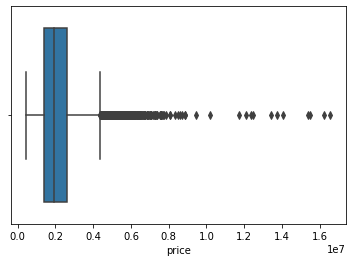

C:\Users\USER\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


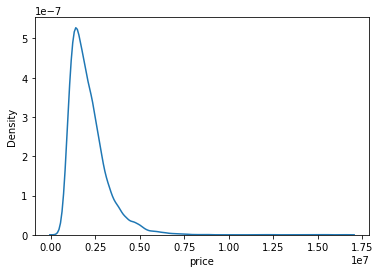

In [139]:
# Exploring the price column

explore_continuous("price")

Notice that the largest value here is NGN 16,568486.16 this is considerably larger than the next largest value which is also an extreme outlier

Is it possible that this could be an error in the data?

The house price in some location like lagos goes for huge amount compare to other location. Its possible the price values are correct.

However, Let's check the row data, loc, title, bedroom, bathroom, and parking_space should give us an idea about whether or not this is a valid piece of data

In [140]:
#get row index of max house price

df["price"].idxmax()

7969

In [141]:
#use idmax to get row 

df.loc[df["price"].idxmax()]

loc                    Lagos
title                Mansion
bedroom                  5.0
bathroom                 1.0
parking_space            3.0
price            16568486.16
Name: 7969, dtype: object

Ok, it seems reasonable that the house price goes for NGN 16,568486 to pay for a Mansion in Lagos.


bedroom Summary


count    14000.000000
mean         3.883071
std          2.533603
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          9.000000
Name: bedroom, dtype: float64


bedroom Random sample
8121     4.0
8714     1.0
10828    1.0
8817     3.0
627      9.0
2142     5.0
116      1.0
11267    1.0
2542     1.0
10417    8.0
Name: bedroom, dtype: float64


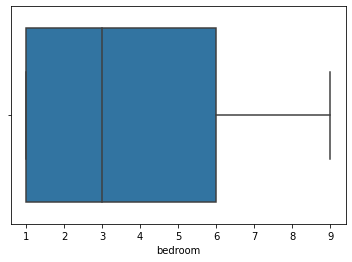

C:\Users\USER\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


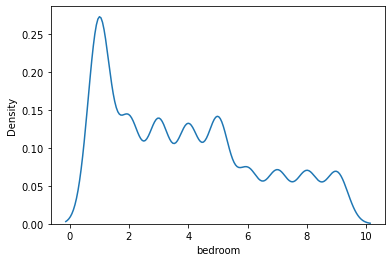

In [142]:
# Plot of bedroom

explore_continuous("bedroom")

The distribution of bedroom within the group of houses looks pretty fair and The vast majority of house bedrooms were close to one. and the distribution has many peaks, which might be the as a result of the categorical form of the numerical value. scalling the data will be appropiate for the model.

bathroom Summary


count    14000.000000
mean         2.859071
std          2.030325
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          7.000000
Name: bathroom, dtype: float64


bathroom Random sample
635      2.0
2536     1.0
4945     1.0
1129     3.0
12638    2.0
12004    7.0
2722     6.0
2324     6.0
1685     7.0
10472    1.0
Name: bathroom, dtype: float64


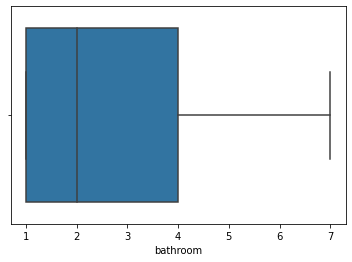

C:\Users\USER\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


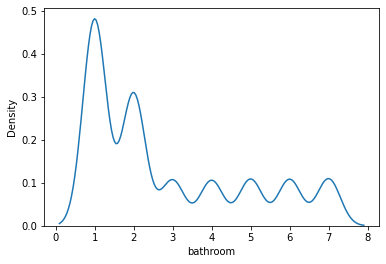

In [143]:
# Plot of bedroom

explore_continuous("bathroom")


The distribution of bathroom within the group of houses looks evenly distributed between 3 and 8 bathrooms and tends to be highe when is closer to one and The vast majority of house bedrooms were close to one. Also the distribution has many peaks, which might be the as a result of the categorical form of the numerical value.

parking_space Summary


count    14000.000000
mean         3.277214
std          1.518162
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: parking_space, dtype: float64


parking_space Random sample
10849    4.0
8932     6.0
5660     4.0
12889    4.0
2108     5.0
8744     4.0
3836     4.0
12258    2.0
3987     6.0
12198    3.0
Name: parking_space, dtype: float64


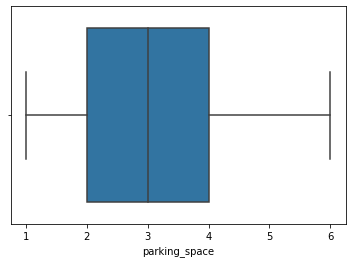

C:\Users\USER\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


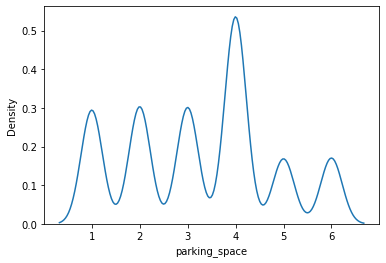

In [144]:
# Plot of bedroom

explore_continuous("parking_space")

Also, The distribution of parking space within the house group looks evenly distributed between 1 and 3 parking space and tends to be higher between 3 and 5, and also evenly spread between 5 and 6. and the distribution has many peaks, which might be the as a result of the categorical form of the numerical value.

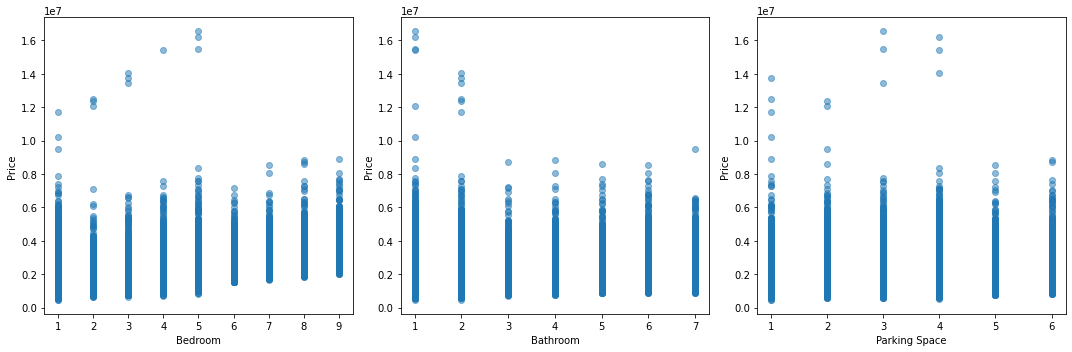

In [145]:
# Plot of dependent variable withe indenpendent  variable

# Extract the independent variables and dependent variable
independent_variables = df[['bedroom', 'bathroom', 'parking_space']]
dependent_variable = df['price']

# Create scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for 'bedroom' vs. 'price'
axs[0].scatter(independent_variables['bedroom'], dependent_variable, alpha=0.5)
axs[0].set_xlabel('Bedroom')
axs[0].set_ylabel('Price')

# Scatter plot for 'bathroom' vs. 'price'
axs[1].scatter(independent_variables['bathroom'], dependent_variable, alpha=0.5)
axs[1].set_xlabel('Bathroom')
axs[1].set_ylabel('Price')

# Scatter plot for 'parking_space' vs. 'price'
axs[2].scatter(independent_variables['parking_space'], dependent_variable, alpha=0.5)
axs[2].set_xlabel('Parking Space')
axs[2].set_ylabel('Price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

loc Summary


loc Counts
Kaduna         2183
Anambra         363
Benue           355
Yobe            353
Borno           351
Kano            351
Nasarawa        349
Cross River     349
Zamfara         348
Imo             348
Ebonyi          346
Kebbi           346
Katsina         345
Ogun            345
Ondo            344
Gombe           343
Bauchi          342
Oyo             341
Adamawa         341
Bayelsa         340
Plateau         338
Osun            338
Jigawa          337
Ekiti           336
Kwara           333
Niger           330
Akwa Ibom       329
Lagos           328
Sokoto          326
Delta           325
Enugu           324
Rivers          323
Kogi            321
Taraba          315
Abia            312
Edo             302
Name: loc, dtype: int64




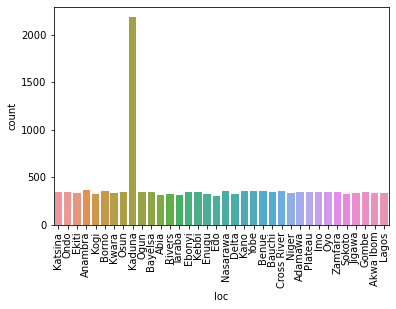

In [146]:
# Exploring the loc column

explore_categorical("loc")

The exploration on location shows that the majority of the house in the dataset are located in kaduna compare to other house location

title Summary


title Counts
Flat                    3094
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64




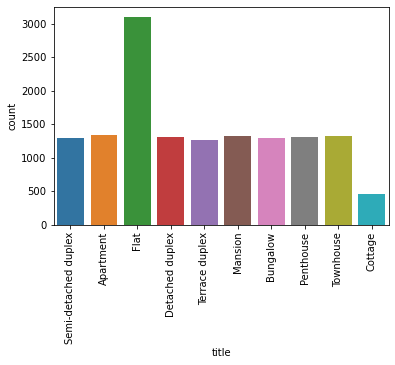

In [147]:
# Exploring the title column

explore_categorical("title")

The exploration on the house title shows that the majority of the house in the dataset are located in kaduna compare to other house titles

In [148]:
# we need to plot heat, so as to know the variables that are high correlated and drop them to prevent multicolinearity

df.select_dtypes(exclude="object").corr().style.background_gradient(cmap="coolwarm")

,bedroom,bathroom,parking_space,price
bedroom,1.000000,0.148814,0.091739,0.451791
bathroom,0.148814,1.000000,0.146186,0.190494
parking_space,0.091739,0.146186,1.000000,0.098458
price,0.451791,0.190494,0.098458,1.000000


###### From our data exploration, location, title, bedroom, bathroom and parking space are important factors affect price of housing.

### Train/Test Split

In [149]:
# spliting the data into x and y train and test data for the model

x = df.drop(["price"], axis=1)

y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =42)

In [161]:
# Create a pipeline for the Model and interate through the  model

model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
    
)

model.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['loc', 'title'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Model Specification

If I write out the equation for the model, it'll be too big to fit on the screen. That's because, when we used the `OneHotEncoder` to encode the location and house title data, we created a much wider DataFrame, and each column/feature has it's own coefficient in our model's equation.


<center><img  alt="Equation: y = β0 + β1 x1 + β2 x2 + ... + β48 x48 + β49 x49 " style="width: 800px;"/></center>

Y_price  =β_(intercept)+β_(loc_kano)+ β_(loc_akwa_ ibom)+⋯+ β_(bathroom )+ β_(parking_space)


In [162]:
y_pred = model.predict(x_test)
y_pred

array([1906937.01966   , 2406432.76004788,  723894.23063054, ...,
       1706245.17043484, 1556039.9030999 , 4671087.69985219])

In [163]:
# Create a Series named feat_imp. The index should contain the names of all the features considered model when making predictions;

intercept = model.named_steps["linearregression"].intercept_
coefficients = model.named_steps["linearregression"].coef_
features = model.named_steps["onehotencoder"].get_feature_names()
feat_imp = pd.Series(coefficients, index=features)

print("Intercept", intercept)
print(feat_imp)


Intercept 2134999.121967943
loc_Kano                      3.860548e+17
loc_Akwa Ibom                 3.692181e+17
loc_Gombe                     3.767287e+17
loc_Ebonyi                    3.820888e+17
loc_Ogun                      3.886738e+17
loc_Abia                      3.664449e+17
loc_Bauchi                    3.692181e+17
loc_Kogi                      3.643498e+17
loc_Kaduna                    8.861154e+17
loc_Enugu                     3.643498e+17
loc_Imo                       3.820888e+17
loc_Bayelsa                   3.834158e+17
loc_Taraba                    3.650496e+17
loc_Borno                     3.860548e+17
loc_Delta                     3.608282e+17
loc_Katsina                   3.712831e+17
loc_Benue                     3.840774e+17
loc_Jigawa                    3.733355e+17
loc_Ondo                      3.787486e+17
loc_Osun                      3.820888e+17
loc_Oyo                       3.767287e+17
loc_Lagos                     3.760528e+17
loc_Rivers                

C:\Users\USER\anaconda4\lib\site-packages\category_encoders\utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


Intercept: The intercept value is 2,134,999.12. the intercept represents the predicted house price when all other features are zero. 

Location Coefficients: the impact of that location on the house price has Positive coefficients indicate that the house price tends to be higher in those location and The magnitude of the coefficient reflects the strength of the impact of the location on the house price.

Title Coefficients: Each "title_" feature represents a specific title type (e.g., Townhouse, Terrace duplex, etc.). The Positive coefficients imply higher house prices for those title types.

Bedroom, Bathroom, and Parking Space Coefficients: These coefficients represent the impact of the number of bedrooms, bathrooms, and parking spaces on the house price. The Positive coefficients indicate that an increase in the number of bedrooms, bathrooms, or parking spaces is associated with higher house prices.

### Performance/ Evaluation Metrics

Root Mean Square Error (RMSE): 660822.29
Model Accuracy: 0.65
R-squared (R2): 0.65
Mean house price: 2135673.35
Baseline MAE: 776993.9646515128
Training MAE: 339551.4945787647


Plot of residual values


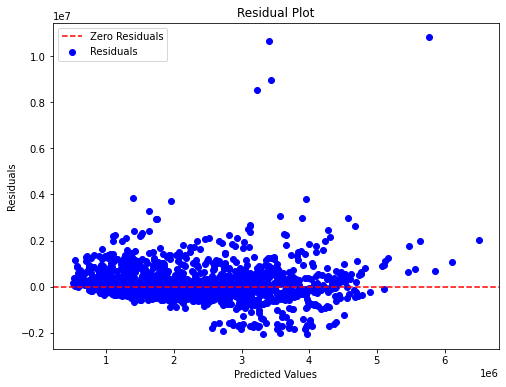

In [183]:
# checking for R squared score

r2 = r2_score(y_test, y_pred)

y_mean = y_train.mean()

y_pred_training = model.predict(x_train)
y_pred_baseline = [y_mean]*len(y_train)

# checking for model accuracy with accuacy score
accuracy = model.score(x_test, y_test)

#Root Mean Square Error (RMSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)


print("Root Mean Square Error (RMSE):", round(rmse, 2))

print("Model Accuracy:", round(accuracy, 2))


print(f"R-squared (R2):", round(r2, 2))


print("Mean house price:", round(y_mean, 2))


print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

print("Training MAE:", mean_absolute_error(y_train,y_pred_training))



residuals = y_test - y_pred

# Step 4: Create residual plots
print("\n")
print("Plot of residual values")
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, c='blue', marker='o', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


The Root Mean Square Error (RMSE) is a measure of the average prediction error of a regression model. In the house pricing prediction model, the RMSE of 660,822.29 means that, on average, the difference between the predicted house prices and the actual house prices is approximately NGN 660,822.29.

Model Accuracy: 0.65
The model's accuracy is 65%, indicating that it correctly predicts outcomes with a probability of 65%.

R-squared (R2): 0.65
The variance in the target variable is explained by the independent variables included in the model. In other words, the model captures a reasonable amount of the variability in the target variable and provides a moderately good fit to the data. However, there is still about 34.77% of the variance that remains unexplained by the model.

Baseline MAE: 776993.9646515128
Training MAE: 339740.9537250625
The lower MAE for the training set indicates that the model is performing better than the baseline model on the training data.

The residual plot is scattered randomly around the horizontal line at y = 0, it generally indicates that the regression model is a good fit for the data. This pattern suggests that the model's predictions are on average very close to the actual observed values, and the residuals (the differences between the observed and predicted values) are distributed evenly across the range of the predictor variable(s).

indicating that the regression model is performing well and providing accurate predictions for the data at hand.


### Prediction

In [221]:
#Load the Test data 

test_data = pd.read_csv("Housing_dataset_test.csv")
print(test_data.info())
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB
None


,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [222]:
predictions = model.predict(test_data.drop(["ID"],axis=1)).round(2)
predictions

array([2464827.97, 1034958.02, 1432652.53, ..., 2164997.55, 1695978.68,
       3638958.68])

In [223]:
predictions = model.predict(test_data.drop(["ID"],axis=1)).round(2)
formatted_predictions = [f'{int(pred):,}'.replace(',', ' ') for pred in predictions]
formatted_predictions

['2 464 827',
 '1 034 958',
 '1 432 652',
 '6 723 210',
 '1 981 199',
 '2 917 685',
 '2 688 004',
 '1 495 094',
 '1 259 815',
 '1 478 917',
 '2 056 913',
 '3 070 522',
 '2 345 948',
 '2 051 974',
 '2 534 718',
 '2 502 780',
 '2 538 837',
 '1 968 175',
 '4 505 671',
 '1 921 300',
 '938 617',
 '1 334 348',
 '2 415 001',
 '2 431 811',
 '2 893 291',
 '1 553 349',
 '1 329 041',
 '2 293 821',
 '3 002 988',
 '3 155 563',
 '1 546 528',
 '1 323 609',
 '1 978 170',
 '1 459 254',
 '2 570 585',
 '1 415 487',
 '1 786 417',
 '2 054 254',
 '3 671 374',
 '3 029 443',
 '1 049 961',
 '3 413 193',
 '2 101 852',
 '3 563 444',
 '2 750 942',
 '1 014 299',
 '2 722 761',
 '1 610 016',
 '1 529 175',
 '1 690 498',
 '1 382 203',
 '1 392 919',
 '2 352 160',
 '1 425 430',
 '1 103 041',
 '1 674 988',
 '2 262 738',
 '1 833 639',
 '695 249',
 '2 439 467',
 '1 204 859',
 '2 823 337',
 '2 501 695',
 '1 569 946',
 '3 199 521',
 '2 182 279',
 '2 279 618',
 '2 944 119',
 '1 519 585',
 '3 807 394',
 '4 288 601',
 '2 396 61

In [224]:
test_data['Target'] = formatted_predictions

In [225]:
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,Target
0,845,Kano,Penthouse,4,1,2,2 464 827
1,1924,Adamawa,Apartment,2,2,4,1 034 958
2,10718,Adamawa,Bungalow,2,7,2,1 432 652
3,12076,Lagos,Mansion,9,5,2,6 723 210
4,12254,Gombe,Semi-detached duplex,5,6,1,1 981 199


### Model's Prediction function Dashboard for Wazobia Real Estate Limited  House Price

In [217]:
# A function make_prediction that takes  arguments and returns your model's prediction for an apartment price.

def make_prediction(Location, Title, Bedroom, Bathroom, Parking_Space):
    
    data = {
        "loc": Location,
        "title": Title,
        "bedroom": Bedroom,
        "bathroom": Bathroom,
        "parking_space": Parking_Space
    }
    
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    formatted_prediction = '{:,.2f}'.format(prediction).replace(",", " ")
    return f"Predicted House price: NGN {formatted_prediction}"
    



## Interactive Dashboard

In [218]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [219]:
interact(
    make_prediction,
     Bedroom=IntSlider(
        min=x_train["bedroom"].min(),
        max=x_train["bedroom"].max(),
        value=x_train["bedroom"].mean(),
    ),
    Bathroom=IntSlider(
        min=x_train["bathroom"].min(),
        max=x_train["bathroom"].max(),
        value=x_train["bathroom"].mean(),
    ),
    Parking_Space=IntSlider(
        min=x_train["parking_space"].min(),
        max=x_train["parking_space"].max(),
        value=x_train["parking_space"].mean(),
    ),
    Location=Dropdown(options=sorted(x_train["loc"].unique())),
    Title=Dropdown(options=sorted(x_train["title"].unique())),
);

interactive(children=(Dropdown(description='Location', options=('Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Ba…

In [241]:
submission_df = test_data[["ID", "Target"]].copy()

# Display the new DataFrame with only "ID" and "Target" columns
submission_df

,ID,Target
0,845,2 464 827
1,1924,1 034 958
2,10718,1 432 652
3,12076,6 723 210
4,12254,1 981 199
...,...,...
5995,1594,1 964 508
5996,2416,2 121 527
5997,10195,2 164 997
5998,9455,1 695 978


In [243]:
# save the submission file into the csv
submission_df.to_csv("submission_file.csv", index=False)